       Size    Weight  Sweetness  Softness  HarvestTime  Ripeness   Acidity
0 -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570  0.271290
1 -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549  0.307325
2 -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643  1.427322
3 -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001  0.477862
4  0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345  2.812442
Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
dtype: int64
Descriptive Statistics:
              Count  Mean  Std Dev   Min   25%   50%   75%   Max  Skewness  \
Size         8000.0 -0.75     2.14 -8.00 -2.28 -0.90  0.65  7.97     -0.90   
Weight       8000.0 -0.76     2.02 -8.28 -2.22 -0.87  0.78  5.68     -0.87   
Sweetness    8000.0 -0.77     1.95 -6.43 -2.11 -1.02  0.31  7.54     -1.02   
Softness     8000.0 -0.01     2.07 -6.96 -1.59  0.20  1.55  8.24      0.20  

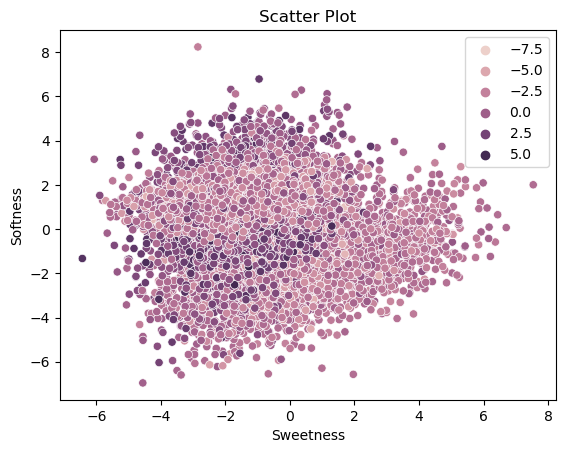

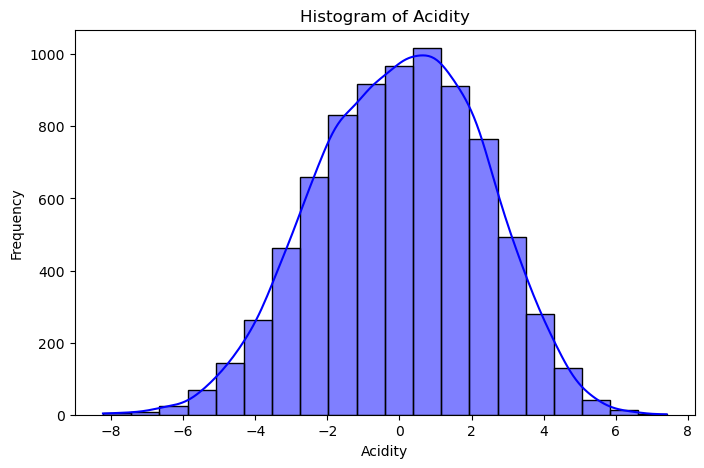

C:\Users\navan\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\navan\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\navan\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\navan\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

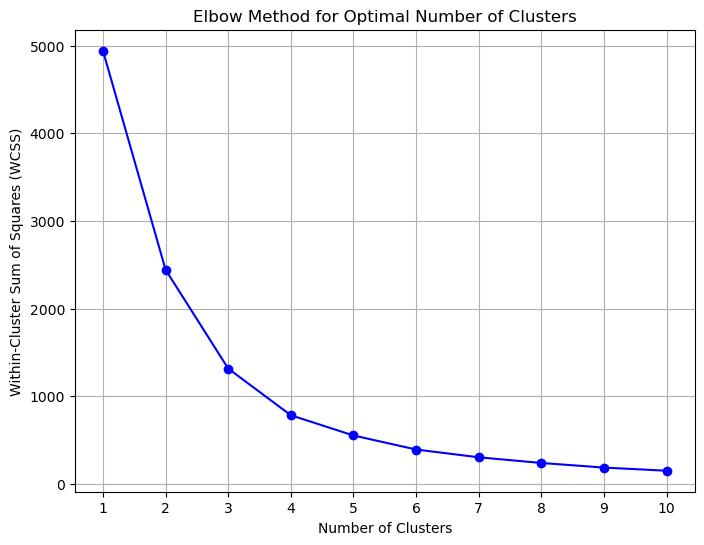

C:\Users\navan\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\navan\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


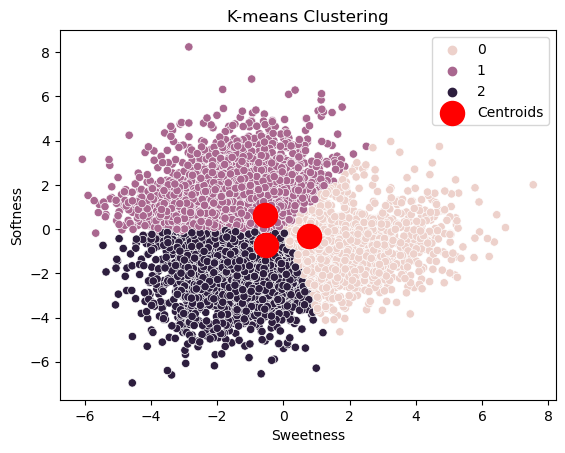

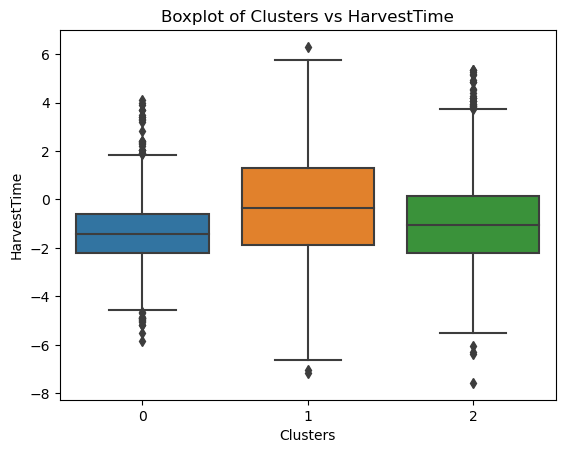

<Axes: >

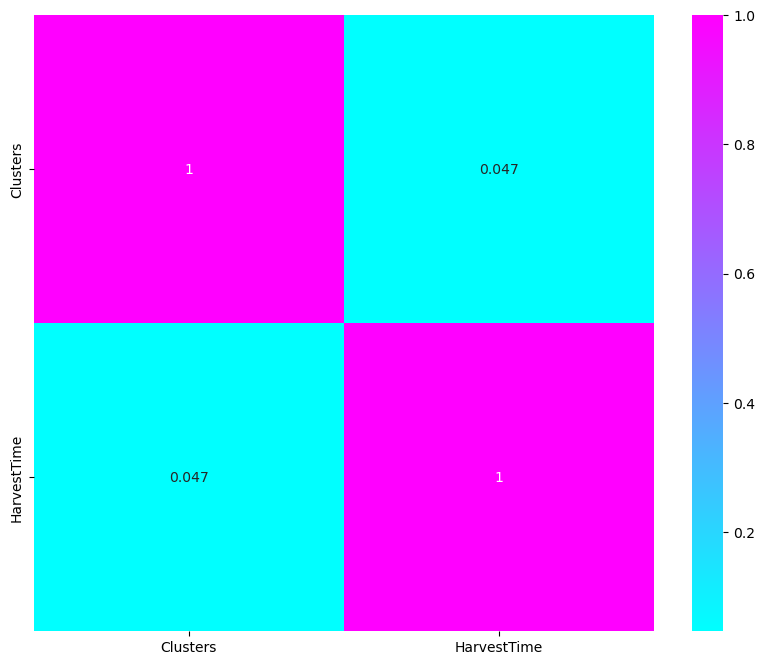

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn import preprocessing

# Load the dataset
data = pd.read_csv('bananaquality.csv') 
print(data.head())

# Check for missing values
print(data.isnull().sum())

def calculate_moments(dataframe):
    numeric_columns = dataframe.select_dtypes(include=['int', 'float']).columns
    moments = dataframe[numeric_columns].describe().transpose()
    
    # Calculate median separately
    median = dataframe[numeric_columns].median()
    skewness = dataframe[numeric_columns].skew()
    kurtosis = dataframe[numeric_columns].kurtosis()
    
    # Concatenate median with other statistics
    statistics_df = pd.concat([moments, median, skewness, kurtosis], axis=1)
    
    # Define column names
    statistics_df.columns = ['Count', 'Mean', 'Std Dev', 'Min', '25%', '50%', '75%', 'Max', 'Skewness', 'Kurtosis', 'Median']
    
    return statistics_df.round(2)

def preprocess_data(X):
    """
    Normalize features.

    Parameters:
    X (DataFrame): The DataFrame containing the features.

    Returns:
    DataFrame: Normalized features.
    """
    return preprocessing.normalize(X)

def find_optimal_clusters(X_train_norm):
    """
    Find the optimal number of clusters using the elbow method.

    Parameters:
    X_train_norm (DataFrame): The normalized training features.

    Returns:
    int: The optimal number of clusters.
    """
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(X_train_norm)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.xticks(range(1, 11))
    plt.grid(True)
    plt.show()

def perform_kmeans_clustering(X_train_norm, optimal_clusters):
    """
    Perform K-means clustering with the optimal number of clusters.

    Parameters:
    X_train_norm (DataFrame): The normalized training features.
    optimal_clusters (int): The optimal number of clusters.
    """
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
    kmeans.fit(X_train_norm)
    return kmeans.labels_

def visualize_kmeans_clustering(X_train, labels, centroids):
    """
    Visualize K-means clustering results.

    Parameters:
    X_train (DataFrame): The training features.
    labels (array-like): Cluster labels.
    centroids (array-like): Cluster centroids.
    """
    sns.scatterplot(data=X_train, x=X_train.columns[0], y=X_train.columns[1], hue=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
    plt.title('K-means Clustering')
    plt.xlabel(X_train.columns[0])
    plt.ylabel(X_train.columns[1])
    plt.legend()
    plt.show()

def visualize_boxplot(data, x_column, y_column):
    """
    Visualize boxplot of clusters vs harvest time.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    x_column (str): The column name for the x-axis (clusters).
    y_column (str): The column name for the y-axis (harvest time).
    """
    sns.boxplot(x=x_column, y=y_column, data=data)
    plt.title('Boxplot of Clusters vs HarvestTime')
    plt.xlabel('Clusters')
    plt.ylabel('HarvestTime')
    plt.show()
    
def visualize_scatter_plot(data, x_column, y_column, hue_column):
    """
    Visualize the dataset using a scatter plot.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    x_column (str): The column name for the x-axis.
    y_column (str): The column name for the y-axis.
    hue_column (str): The column name to determine the color of points.

    Returns:
    None
    """
    sns.scatterplot(data=data, x=x_column, y=y_column, hue=hue_column)
    plt.title('Scatter Plot')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.show()    

def plot_histogram(data, column_name):
    """
    Plot histogram of a specific column.

    Parameters:
    data (DataFrame): The DataFrame containing the data.
    column_name (str): The column name for which to plot the histogram.
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=column_name, bins=20, kde=True, color='blue')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()    

def calculate_correlation(data):
    """
    Calculate the correlation matrix between features.

    Parameters:
    data (DataFrame): The DataFrame containing the data.

    Returns:
    DataFrame: Correlation matrix.
    """
    return data.corr()    

# to print Descriptive Statistics
print("Descriptive Statistics:")
statistics_df = calculate_moments(data)
print(statistics_df)

# calculation of calculate_moments
calculate_moments(data)

# Visualize the dataset using scatter plot
# visualize_scatter_plot(home_data, 'Sweetness', 'Softness', 'HarvestTime')
# Usage
visualize_scatter_plot(data, x_column='Sweetness', y_column='Softness', hue_column='HarvestTime')

# create histogram of HarvestTime
plot_histogram(data, 'Acidity')

# Data Preparation: Normalize features
X = data[['Sweetness', 'Softness']]
X_train, X_test, y_train, y_test = train_test_split(X, data['HarvestTime'], test_size=0.33, random_state=0)
X_train_norm = preprocess_data(X_train)

# Elbow Method to find optimal number of clusters
find_optimal_clusters(X_train_norm)

# Perform K-means Clustering
optimal_clusters = 3  # Adjust this value based on the elbow method graph
labels = perform_kmeans_clustering(X_train_norm, optimal_clusters)

# Visualize K-means Clustering
centroids = KMeans(n_clusters=optimal_clusters, random_state=0).fit(X_train_norm).cluster_centers_
visualize_kmeans_clustering(X_train, labels, centroids)

# Visualize Boxplot of Clusters vs HarvestTime
data = pd.DataFrame({'Clusters': labels, 'HarvestTime': y_train})
visualize_boxplot(data, 'Clusters', 'HarvestTime')

# Calculate and visualize correlation matrix
correlation_matrix = calculate_correlation(data)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cool')
